# Problem 2

In [ ]:
# Setup:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import warnings

warnings.filterwarnings("ignore")

# Fix random seed for reproducibility
np.random.seed(42)

b=6
#MiepmIep
a=2
#hihi


## Loading the Data for Problem 2

This code loads the data from `bv_data.csv` using the load_data helper function. Note that `data[:, 0]` is an array of all the $x$ values in the data and `data[:, 1]` is an array of the corresponding $y$ values.

In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    Input:
        filename: given as a string.
    Output:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=",")

In [ ]:
data = load_data("bv_data.csv")
x = data[:, 0]
y = data[:, 1]

Write your code below for solving problem 2 part B:

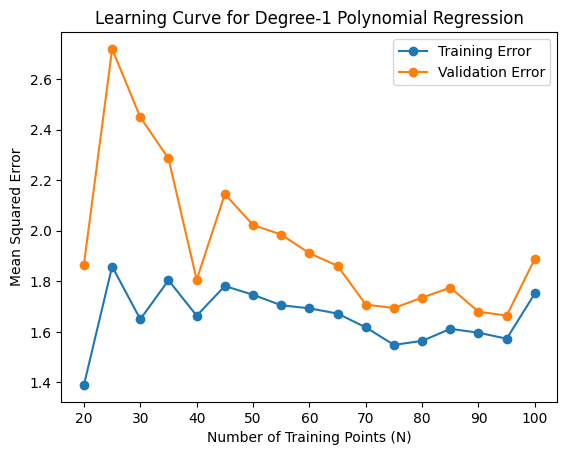

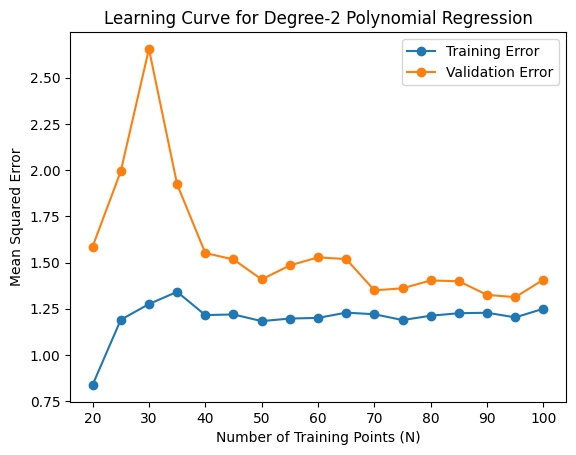

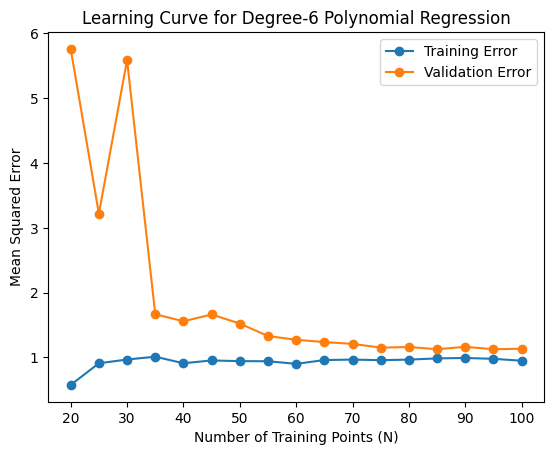

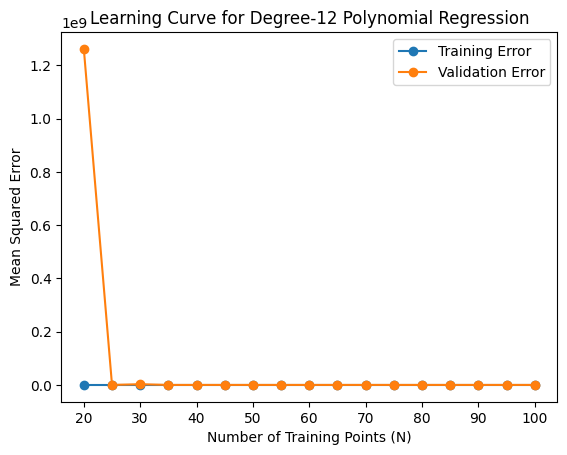

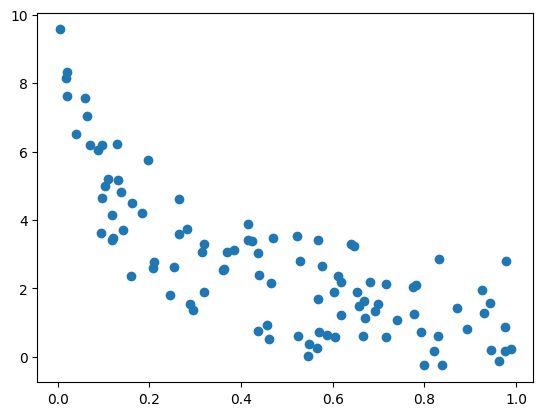

In [ ]:
# Polynomial degrees to test
degrees = [1, 2, 6, 12]

# Range of training set sizes
N_values = np.arange(20, 105, 5)

# Perform cross-validation and plot learning curves
for degree in degrees:
    train_errors = []
    val_errors = []

    for N in N_values:
        x_subset = x[:N]
        y_subset = y[:N]

        kf = KFold(n_splits=5)
        fold_train_errors = []
        fold_val_errors = []

        for train_index, val_index in kf.split(x_subset):
            x_train, x_val = x_subset[train_index], x_subset[val_index]
            y_train, y_val = y_subset[train_index], y_subset[val_index]

            # Fit polynomial model
            coefficients = np.polyfit(x_train, y_train, degree)

            # Compute errors
            y_train_pred = np.polyval(coefficients, x_train)
            y_val_pred = np.polyval(coefficients, x_val)

            train_error = np.mean((y_train - y_train_pred) ** 2)
            val_error = np.mean((y_val - y_val_pred) ** 2)

            fold_train_errors.append(train_error)
            fold_val_errors.append(val_error)

        # Store mean errors across folds
        train_errors.append(np.mean(fold_train_errors))
        val_errors.append(np.mean(fold_val_errors))

    # Plot learning curve
    plt.figure()
    plt.plot(N_values, train_errors, label="Training Error", marker="o")
    plt.plot(N_values, val_errors, label="Validation Error", marker="o")
    plt.xlabel("Number of Training Points (N)")
    plt.ylabel("Mean Squared Error")
    plt.title(f"Learning Curve for Degree-{degree} Polynomial Regression")
    plt.legend()
    plt.show()


plt.scatter(x,y)
plt.show()